In [12]:
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#readin accepted loans
accepted_loans_df = pd.read_excel("../data/LoanStats3a_BP_edits.xls", sheet_name="Sheet1");

In [6]:
#take a quick peek to make sure data was read in properly
print(accepted_loans_df.shape);
display(accepted_loans_df.head())

(42538, 10)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,zip_code,addr_state
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,860xx,AZ
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,309xx,GA
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,606xx,IL
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,917xx,CA
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,972xx,OR


In [7]:
accepted_loans_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000
mean,11089.722581,10821.585753,10139.938785,0.121650,322.623063
std,7410.938391,7146.914675,7131.598014,0.037079,208.927216
min,500.000000,500.000000,0.000000,0.054200,15.670000
25%,5200.000000,5000.000000,4950.000000,0.096300,165.520000
50%,9700.000000,9600.000000,8500.000000,0.119900,277.690000
75%,15000.000000,15000.000000,14000.000000,0.147200,428.180000
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000


In [38]:
grade_groupby = accepted_loans_df.groupby('grade').agg({
    'loan_amnt': np.mean, #The listed amount of the loan applied for by the borrower. 
                        #If at some point in time, the credit department reduces the loan amount, 
                        #then it will be reflected in this value.
    'funded_amnt_inv': np.mean, #The total amount committed by investors for that loan at that point in time.
    'funded_amnt': np.mean, #The total amount committed to that loan at that point in time.
    'int_rate': np.mean
});
display(grade_groupby)

,loan_amnt,funded_amnt_inv,funded_amnt,int_rate
grade,,,,
A,8598.261809,8118.220295,8376.229991,0.073427
B,11047.846880,10218.879847,10793.038179,0.110142
C,10872.291190,9802.378579,10652.488558,0.134999
D,11848.682680,10795.355016,11647.057846,0.155771
E,14703.587213,13044.810309,14160.584856,0.173768
F,17150.634128,15112.898833,16534.511914,0.192653
G,17091.845703,14607.703878,16683.935547,0.204512


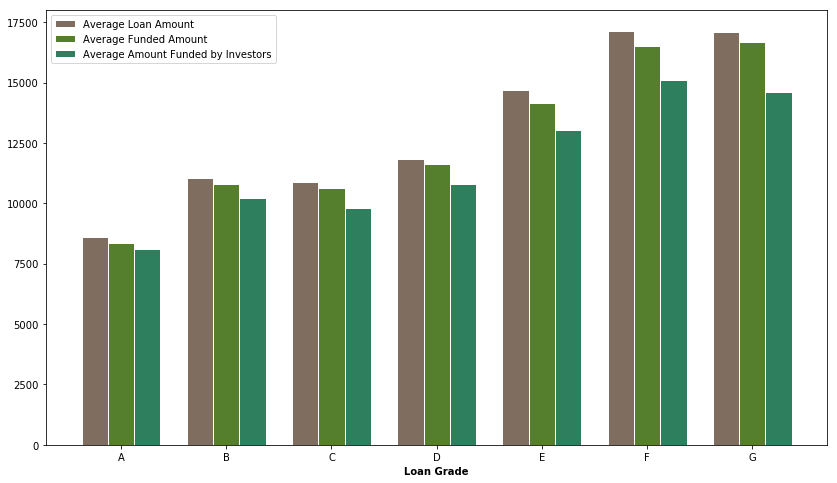

In [39]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = grade_groupby.loan_amnt
bars2 = grade_groupby.funded_amnt
bars3 = grade_groupby.funded_amnt_inv
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize = (14,8))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Average Loan Amount')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Average Funded Amount')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Average Amount Funded by Investors')
 
# Add xticks on the middle of the group bars
plt.xlabel('Loan Grade', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], grade_groupby.index.tolist())
 
# Create legend & Show graphic
plt.legend()
plt.show()


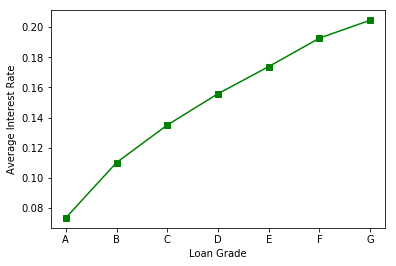

In [60]:
x_p = np.linspace(1,7,7)
plt.plot(x_p,grade_groupby.int_rate, '-s', c = 'g')
plt.xticks(x_p, grade_groupby.index.tolist())
plt.xlabel('Loan Grade')
plt.ylabel('Average Interest Rate')
plt.show()